# Allstate Claims Severity

### 1. Get Data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('train.csv')

In [4]:
data.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


In [6]:
data1 = pd.read_csv('test.csv')

In [7]:
data1.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,4,A,B,A,A,A,A,A,A,B,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,6,A,B,A,B,A,A,A,A,B,...,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,9,A,B,A,B,B,A,B,A,B,...,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,12,A,A,A,A,B,A,A,A,A,...,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,15,B,A,A,A,A,B,A,A,A,...,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125546 entries, 0 to 125545
Columns: 131 entries, id to cont14
dtypes: float64(14), int64(1), object(116)
memory usage: 125.5+ MB


In [9]:
predictors = pd.concat([data.drop('loss', axis=1), data1]).set_index('id')
predictors.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
id,,,,,,,,,,,,,,,,,,,,,
1,A,B,A,B,A,A,A,A,B,A,...,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843
2,A,B,A,A,A,A,A,A,B,B,...,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496
5,A,B,A,A,B,A,A,A,B,B,...,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425
10,B,B,A,B,A,A,A,A,B,A,...,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642
11,A,B,A,B,A,A,A,A,B,B,...,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606


In [10]:
target = pd.DataFrame(data.loss).set_index(data['id'])

In [11]:
target

,loss
id,
1,2213.18
2,1283.60
5,3005.09
10,939.85
11,2763.85
...,...
587620,1198.62
587624,1108.34
587630,5762.64


In [12]:
# separate indices of training data and testing data
predictors_index = data.id.tolist()
target_index = data1.id.tolist()

In [13]:
del data
del data1

In [14]:
predictors = predictors.sort_index()
predictors

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
id,,,,,,,,,,,,,,,,,,,,,
1,A,B,A,B,A,A,A,A,B,A,...,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843
2,A,B,A,A,A,A,A,A,B,B,...,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496
4,A,B,A,A,A,A,A,A,B,A,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
5,A,B,A,A,B,A,A,A,B,B,...,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425
6,A,B,A,B,A,A,A,A,B,A,...,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587629,A,A,A,A,A,B,A,B,A,A,...,0.302678,0.372125,0.388545,0.31796,0.32128,0.36974,0.307628,0.301921,0.608259,0.361542
587630,A,B,A,A,A,A,A,B,B,A,...,0.482436,0.345883,0.370534,0.24564,0.45808,0.47779,0.445614,0.443374,0.339244,0.503888
587632,A,B,A,A,A,A,A,A,B,B,...,0.340543,0.704364,0.562866,0.34987,0.44767,0.53881,0.863052,0.852865,0.654753,0.721707


In [15]:
predictors_train = predictors.loc[predictors_index, :]
predictors_test = predictors.loc[target_index, :]

In [16]:
predictors_train.shape, predictors_test.shape

((188318, 130), (125546, 130))

### 2. EDA and Feature Engineering

In [17]:
# check for missing values
predictors.isna().any().sum()

0

In [18]:
cat_cols = predictors.columns.tolist()[:116]
cont_cols = predictors.columns.tolist()[116:]


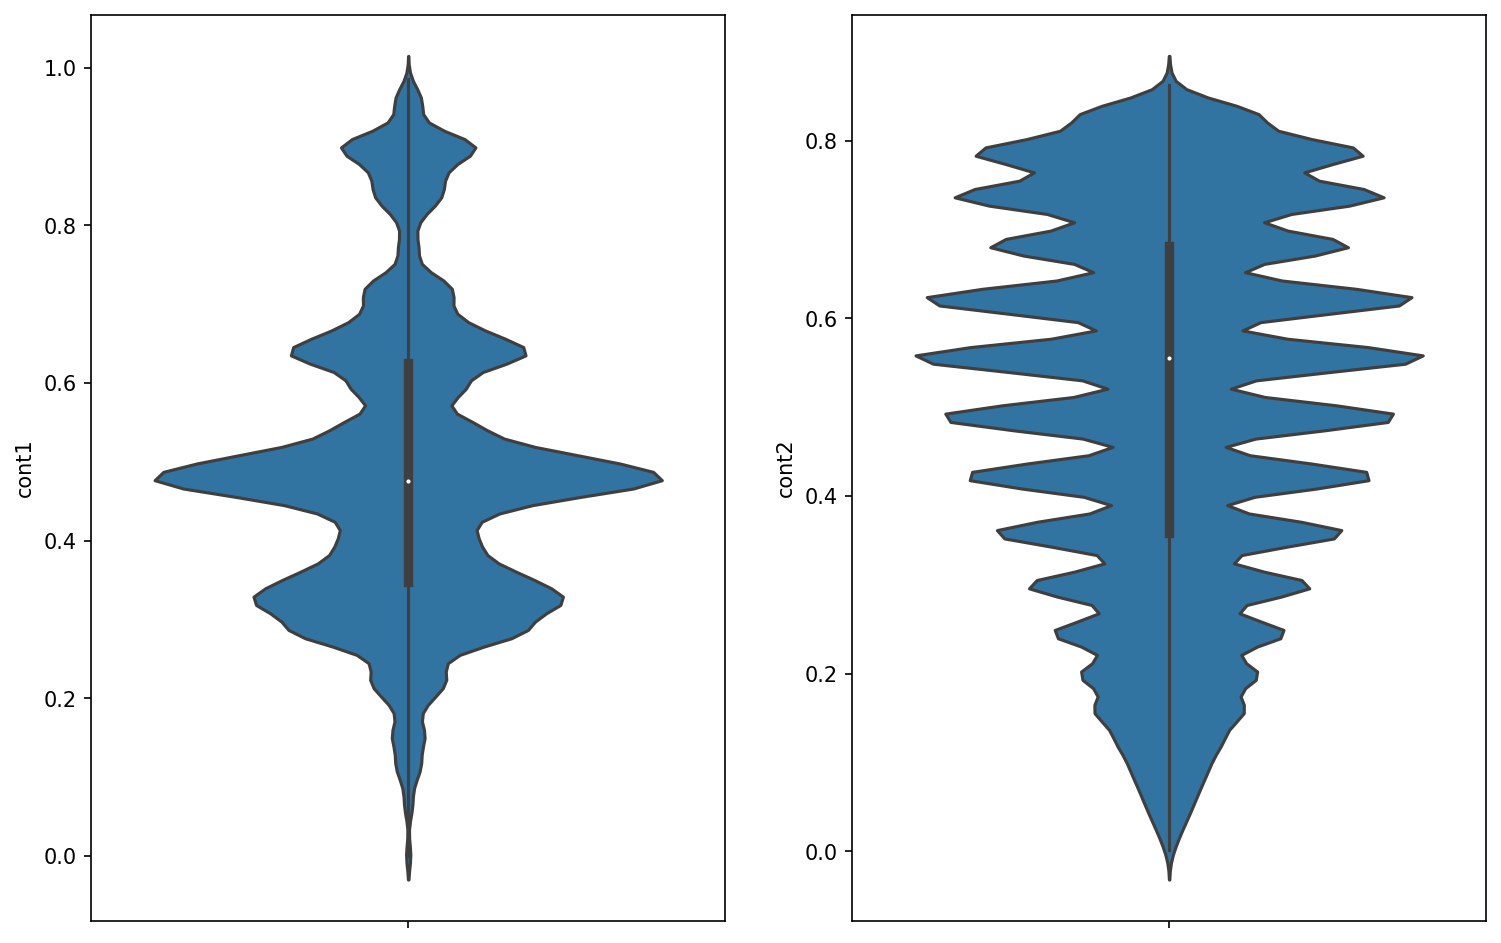

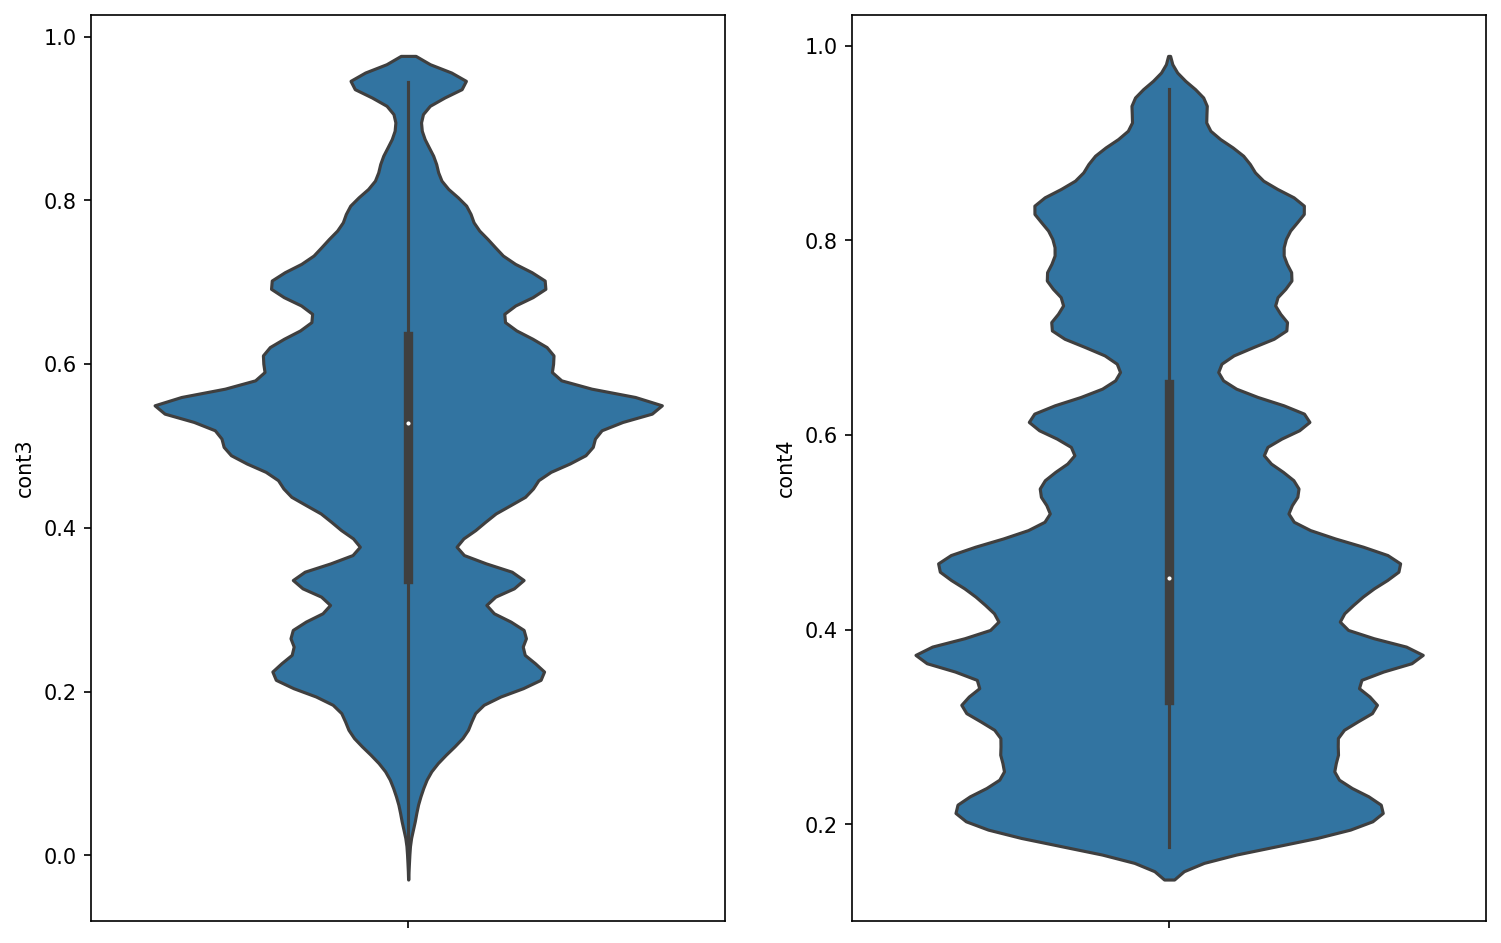

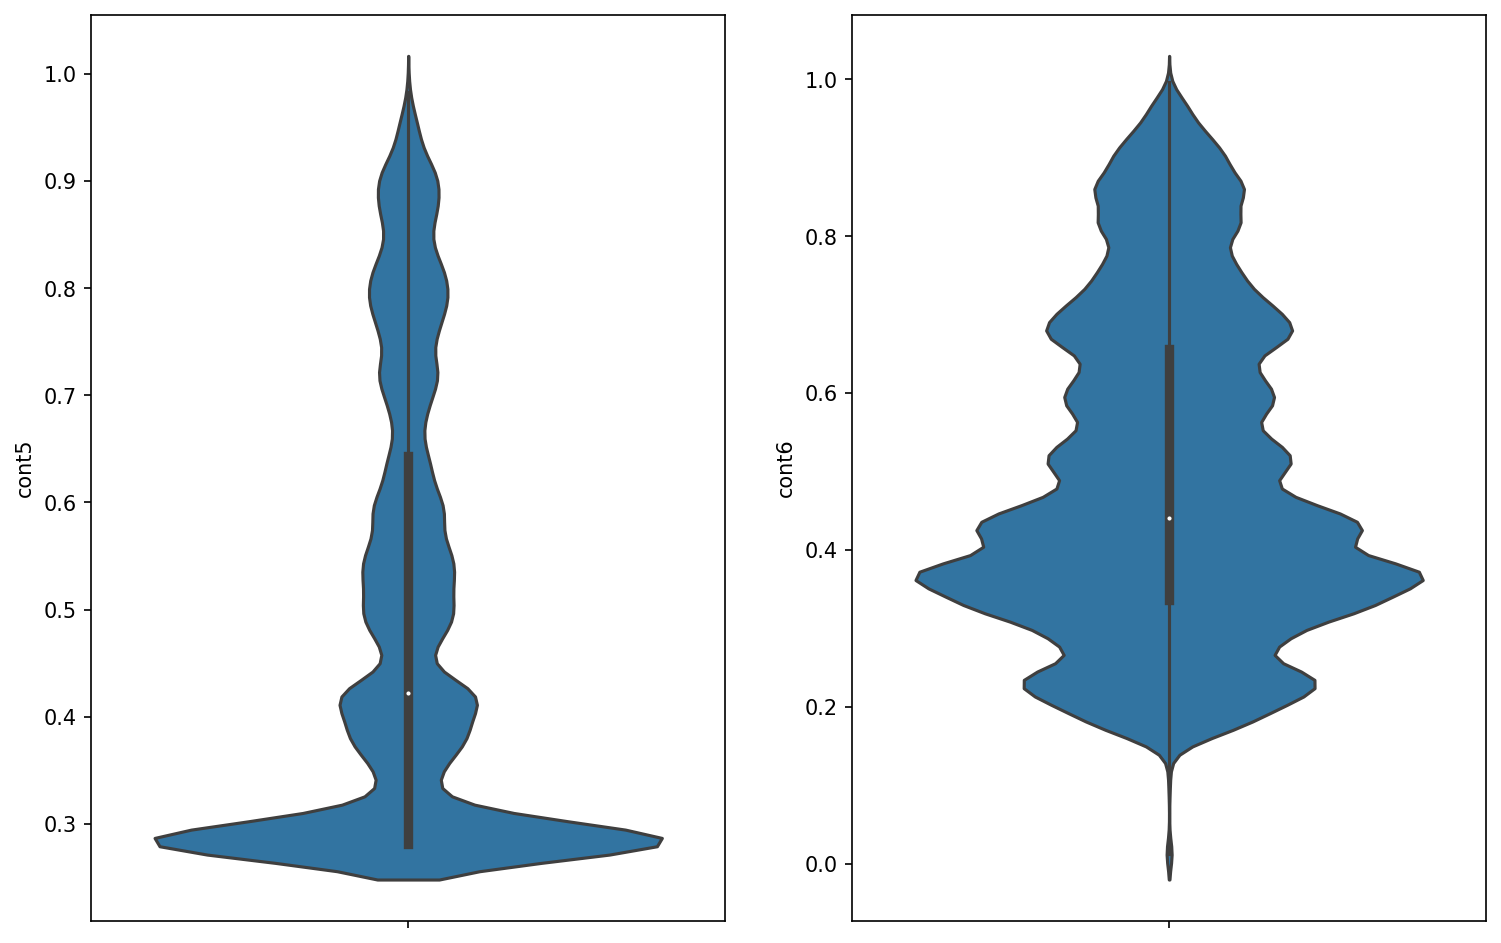

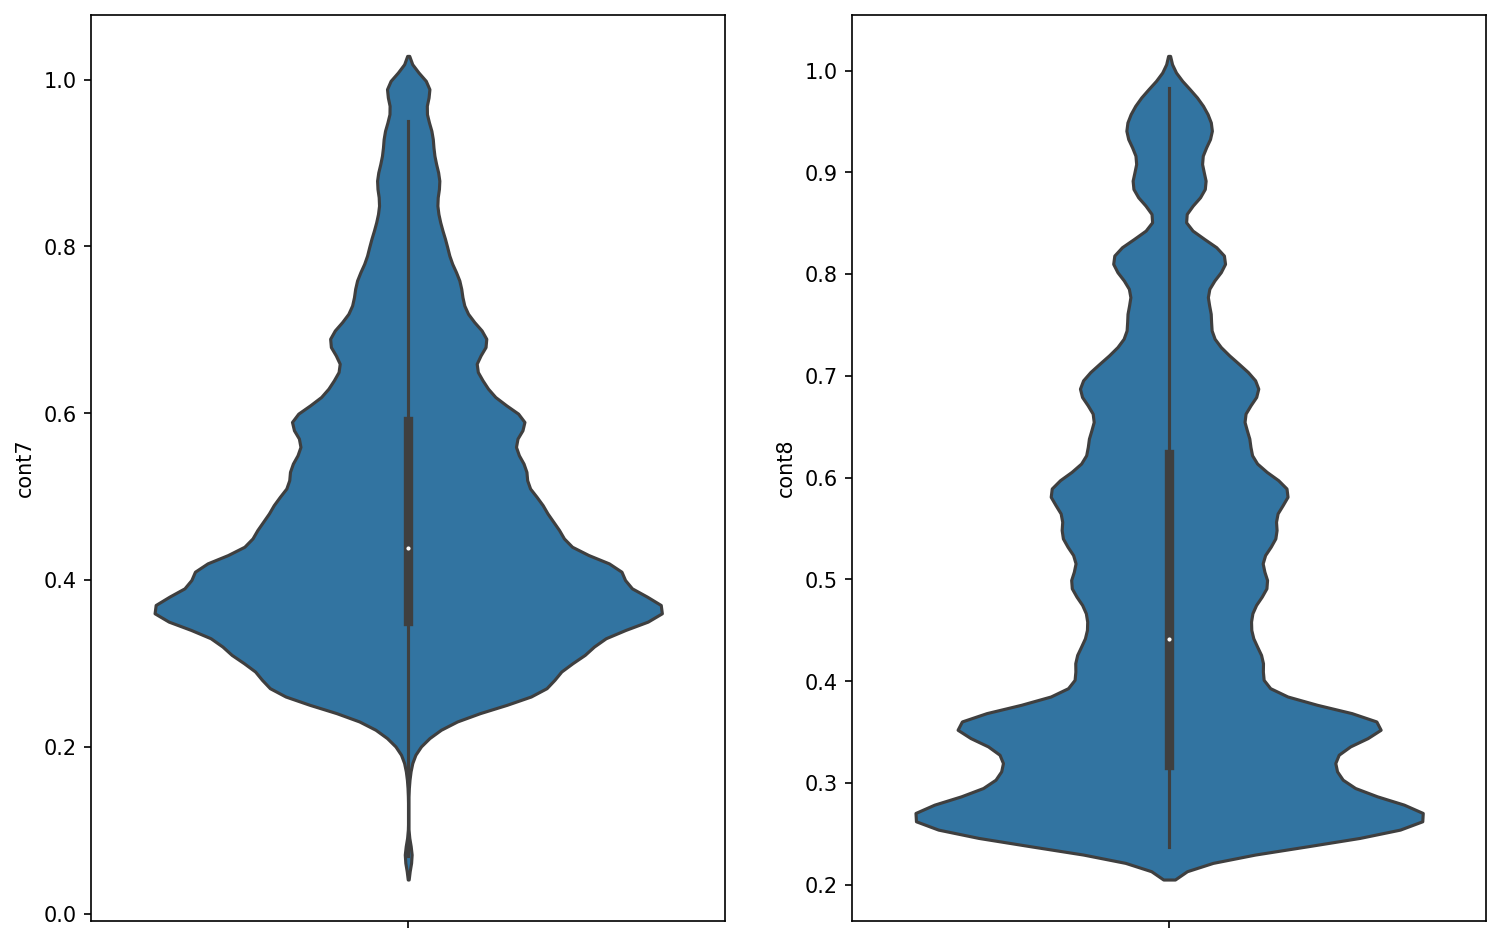

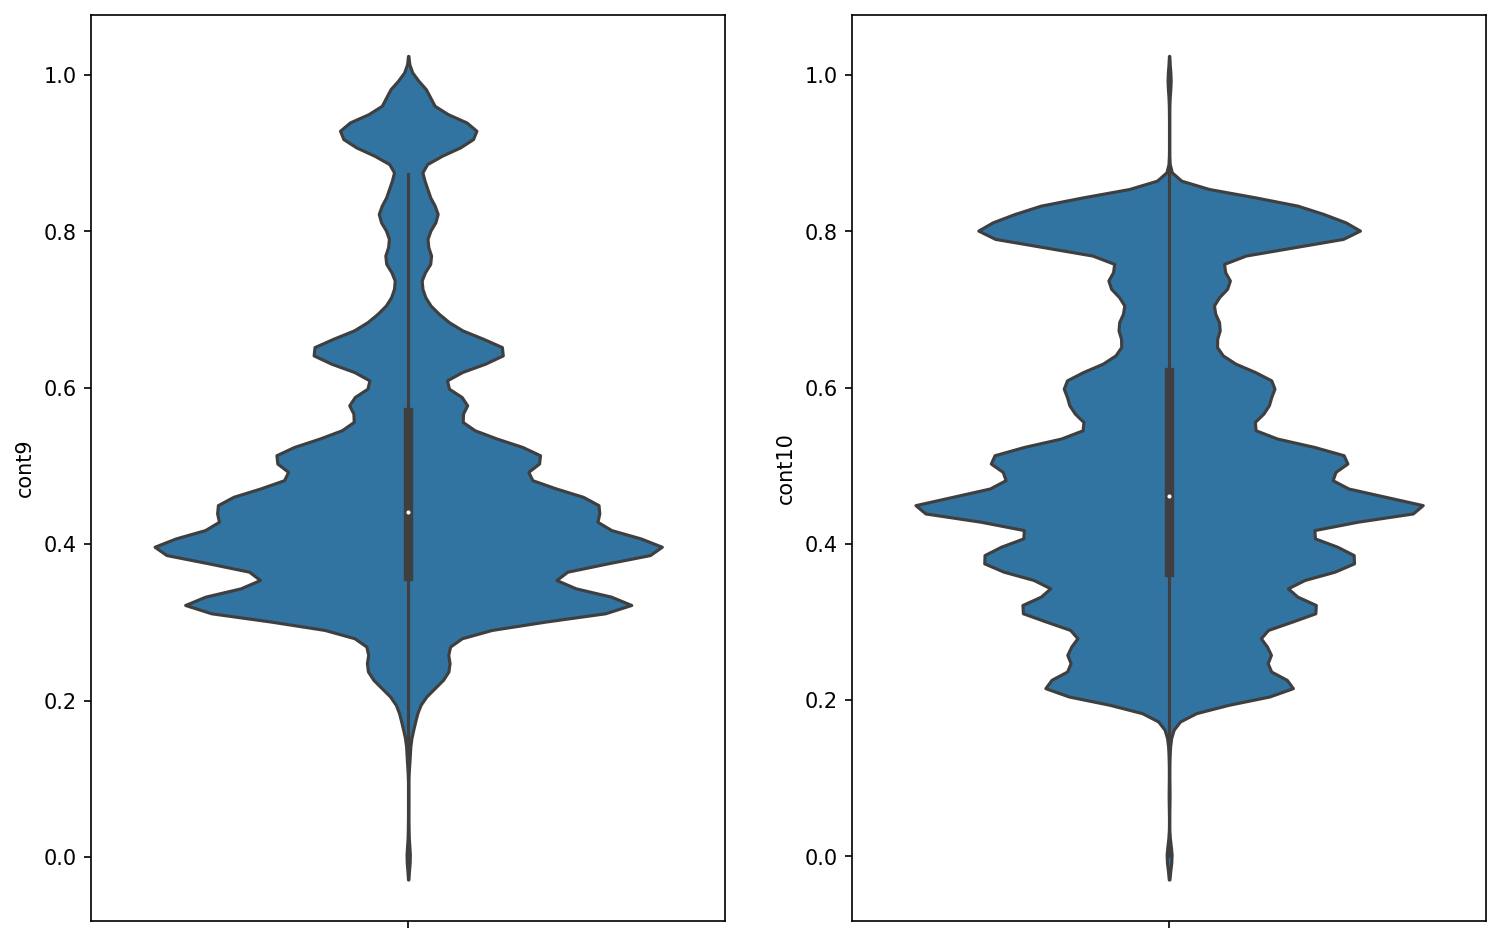

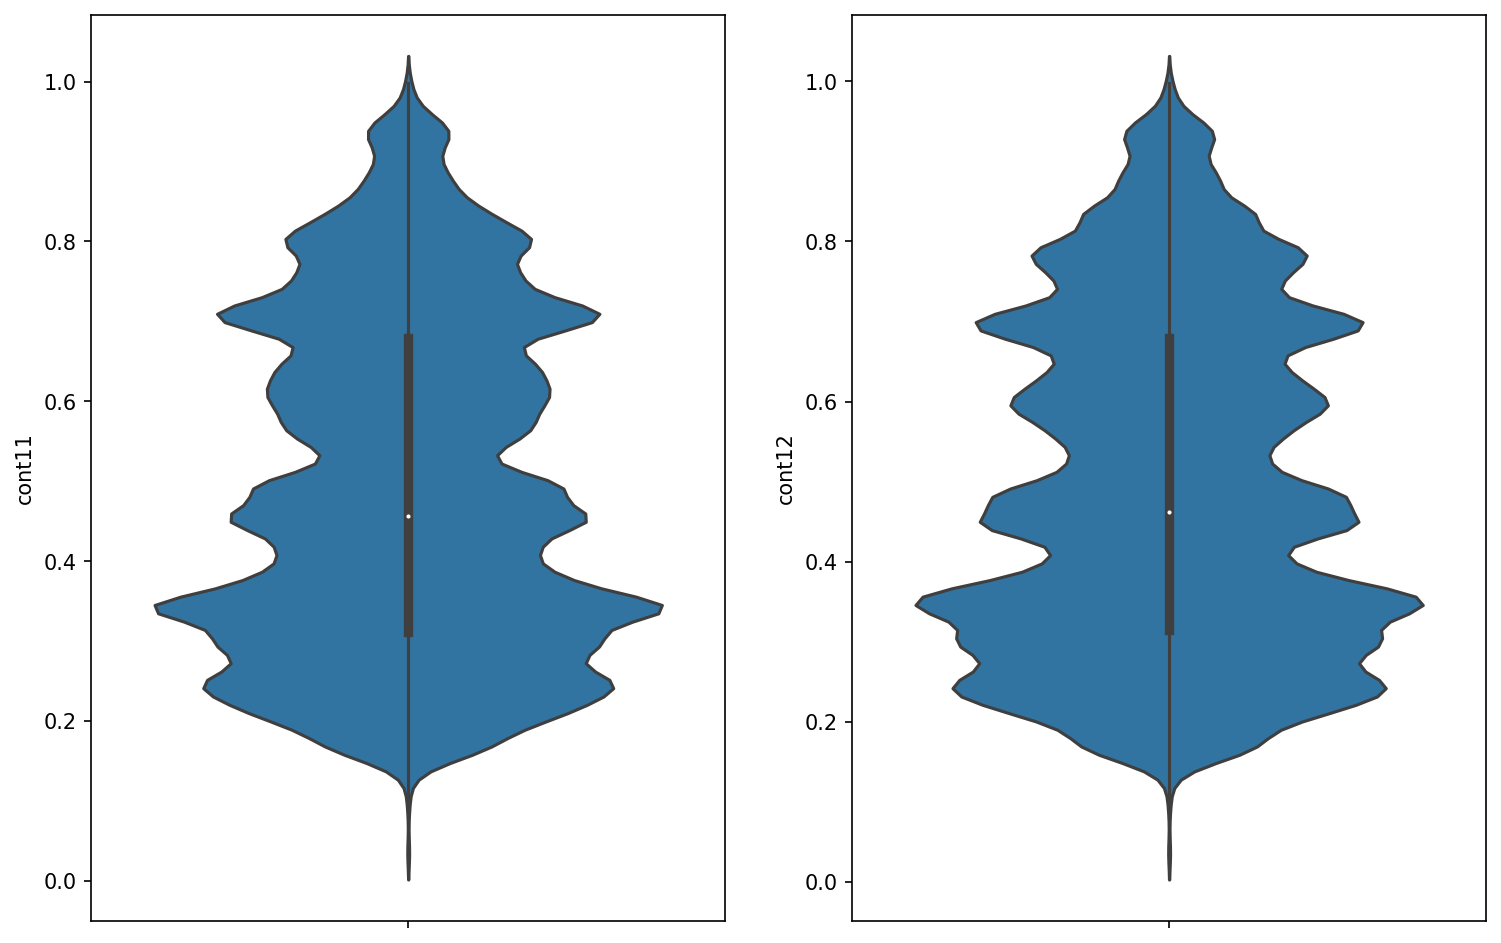

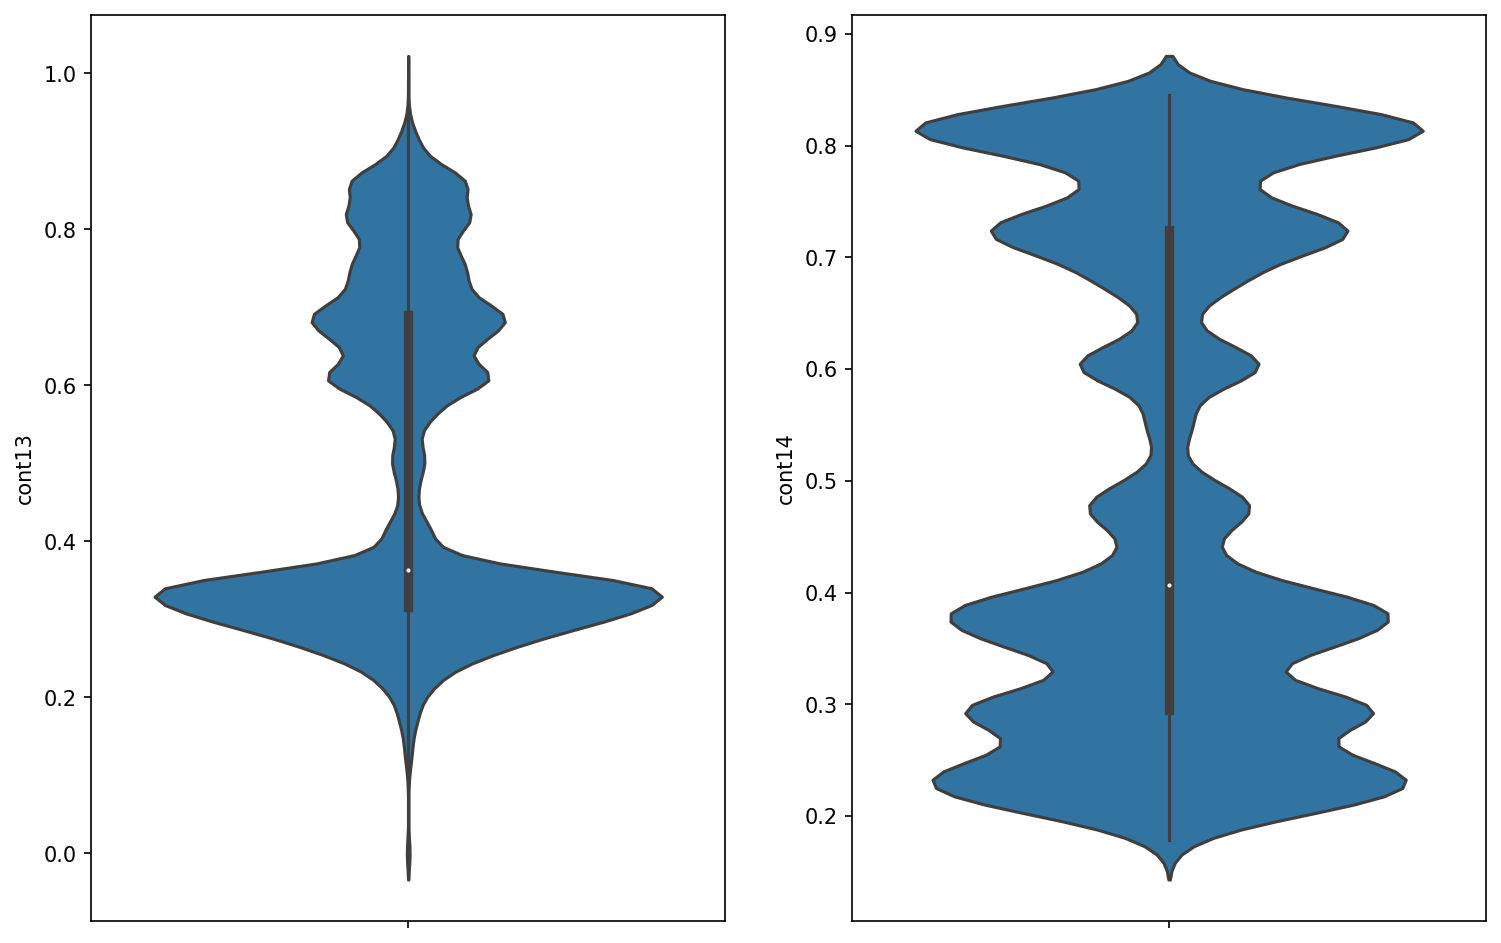

In [19]:
# visualize contnuous variables
plt.rcParams['figure.dpi'] = 150

n_cols = 2
n_rows = 7

for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,figsize=(12, 8))
    for j in range(n_cols):
        sns.violinplot(y=cont_cols[i*n_cols+j], data=predictors, ax=ax[j])


In [20]:
# check for skew

from scipy.stats import skew

skew_ = skew(predictors_train[cont_cols])
prediictors_and_skew = pd.DataFrame(zip(cont_cols, skew_))
prediictors_and_skew.sort_values(by=1)

,0,1
1,cont2,-0.310939
2,cont3,-0.010002
13,cont14,0.248672
10,cont11,0.280819
11,cont12,0.291990
9,cont10,0.354998
12,cont13,0.380739
3,cont4,0.416093
5,cont6,0.461211
0,cont1,0.516420


In [21]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

pt.fit(predictors_train[cont_cols])

PowerTransformer(copy=True, method='yeo-johnson', standardize=True)

In [22]:
predictors_train[cont_cols] = pt.transform(predictors_train[cont_cols])
predictors_test[cont_cols] = pt.transform(predictors_test[cont_cols])

In [23]:
skew_ = skew(predictors_train[cont_cols])
prediictors_and_skew = pd.DataFrame(zip(cont_cols, skew_))
prediictors_and_skew.sort_values(by=1)

,0,1
1,cont2,-0.102176
2,cont3,-0.027912
8,cont9,-0.012653
0,cont1,0.003913
9,cont10,0.020272
10,cont11,0.023379
11,cont12,0.024830
5,cont6,0.038875
3,cont4,0.051768
6,cont7,0.054278


In [24]:
pt = PowerTransformer(method='yeo-johnson')

pt.fit(target)
target['loss'] = pt.transform(target)

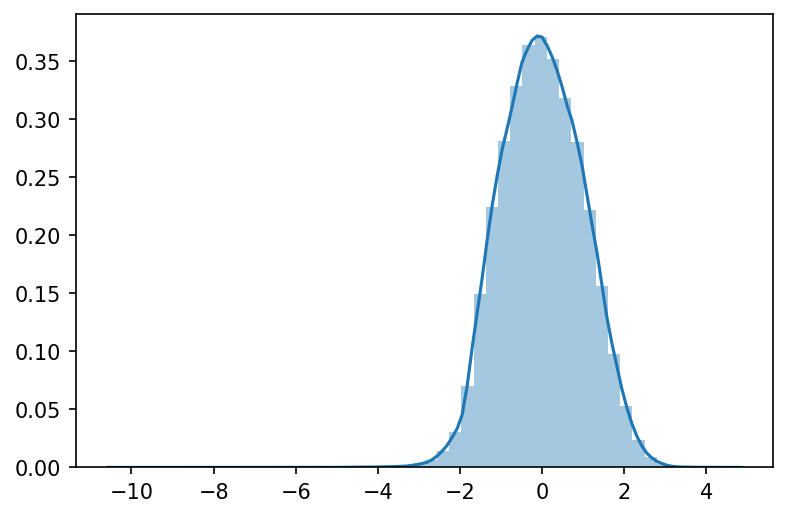

In [25]:
sns.distplot(target)

In [26]:
# correlation matrix
cont_vars = predictors[cont_cols].corr()
cont_vars

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
cont1,1.000000,-0.083952,-0.445421,0.367405,-0.024688,0.758326,0.367416,0.361388,0.930675,0.808348,0.596406,0.614666,0.533811,0.056945
cont2,-0.083952,1.000000,0.455592,0.039860,0.189055,0.016276,0.048294,0.137631,-0.031313,0.063809,0.117304,0.106756,0.022391,-0.046519
cont3,-0.445421,0.455592,1.000000,-0.342102,0.089966,-0.349864,0.097863,-0.184817,-0.417043,-0.326211,0.024356,0.004944,-0.420499,-0.039961
cont4,0.367405,0.039860,-0.342102,1.000000,0.162684,0.221849,-0.113945,0.531246,0.329785,0.283009,0.122028,0.131676,0.179797,0.017699
cont5,-0.024688,0.189055,0.089966,0.162684,1.000000,-0.150292,-0.249430,0.009375,-0.087344,-0.066091,-0.150864,-0.147580,-0.083578,-0.022065
cont6,0.758326,0.016276,-0.349864,0.221849,-0.150292,1.000000,0.658667,0.438032,0.797387,0.883910,0.774715,0.786202,0.813994,0.041351
cont7,0.367416,0.048294,0.097863,-0.113945,-0.249430,0.658667,1.000000,0.143452,0.384268,0.492947,0.747605,0.743182,0.286068,0.021427
cont8,0.361388,0.137631,-0.184817,0.531246,0.009375,0.438032,0.143452,1.000000,0.452110,0.337773,0.304621,0.318134,0.475566,0.044115
cont9,0.930675,-0.031313,-0.417043,0.329785,-0.087344,0.797387,0.384268,0.452110,1.000000,0.786035,0.608503,0.627238,0.640639,0.074520
cont10,0.808348,0.063809,-0.326211,0.283009,-0.066091,0.883910,0.492947,0.337773,0.786035,1.000000,0.703953,0.715014,0.707290,0.041027


In [27]:
# investigate correlation between correlated predictors and target
from scipy.stats import pearsonr
pearsonr(target.loss.values.tolist(),np.array(predictors_train['cont11']).reshape(-1,1).flatten().tolist())

(0.06821414894518282, 5.095935932532968e-193)

In [28]:
pearsonr(target.loss.values.tolist(),np.array(predictors_train['cont12']).reshape(-1,1).flatten().tolist())

(0.06748152625640061, 6.251146112362553e-189)

In [29]:
pearsonr(target.loss.values.tolist(),np.array(predictors_train['cont1']).reshape(-1,1).flatten().tolist())

(-0.011045299043843956, 1.6406770351951357e-06)

In [30]:
pearsonr(target.loss.values.tolist(),np.array(predictors_train['cont9']).reshape(-1,1).flatten().tolist())

(0.011146957045256494, 1.3154224640546649e-06)

In [31]:
# hence, drop cont12 and cont1 which are less correlated with the target
predictors_train = predictors_train.drop(['cont1', 'cont12'], axis=1)
predictors_test = predictors_test.drop(['cont1', 'cont12'], axis=1)

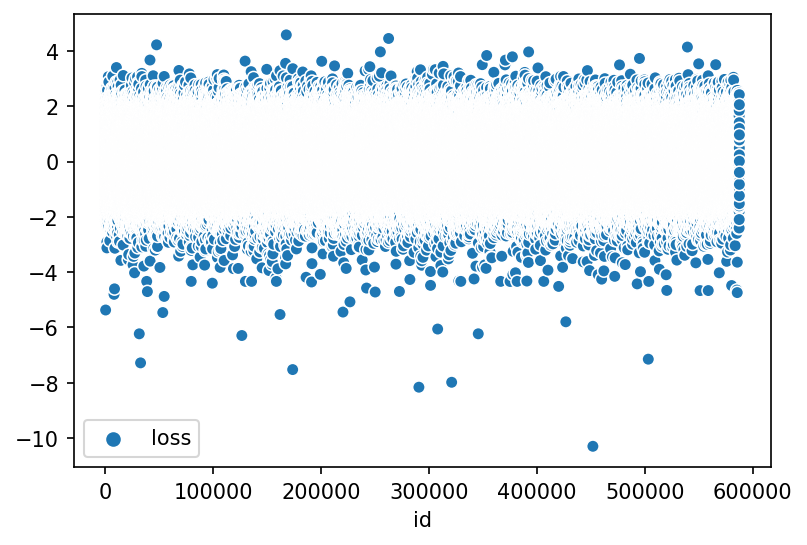

In [32]:
# investigate outliers in target
sns.scatterplot(data=target)

In [33]:
target_mean = target.mean()
target_std = target.std()
cutoff = 3*target_std

lower, upper = target_mean-cutoff, target_mean+cutoff

mask = (target>lower) & (target<upper)

In [34]:
target = target[mask.values.flatten().tolist()]
predictors_train = predictors_train[mask.values.flatten().tolist()]
target.shape, predictors_train.shape

((187974, 1), (187974, 128))

In [35]:
predictors_trainandtest = pd.concat([predictors_train, predictors_test])

In [36]:
# predictors_trainandtest = pd.get_dummies(predictors_trainandtest, drop_first=True)

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in predictors_trainandtest.columns:
    predictors_trainandtest[col] = le.fit_transform(predictors_trainandtest[col])

In [38]:
predictors_trainandtest

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont13,cont14
id,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,1,0,0,0,0,1,0,...,70,4,1728,1359,14,244,162,155,276,16071
2,0,1,0,0,0,0,0,0,1,1,...,49,86,912,2357,66,111,79,97,197,5101
5,0,1,0,0,1,0,0,0,1,1,...,9,15,448,1153,8,67,57,109,60,18269
10,1,1,0,1,0,0,0,0,1,0,...,25,18,917,1938,17,97,80,94,195,13307
11,0,1,0,1,0,0,0,0,1,1,...,35,52,122,507,2,47,31,54,82,10018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587617,0,0,0,1,0,0,0,0,0,0,...,15,0,912,4856,31,170,73,151,102,6354
587621,0,0,0,0,1,1,0,1,0,0,...,13,48,626,2253,45,66,45,93,161,4611
587627,1,1,0,0,1,0,0,0,1,1,...,47,66,1981,2980,89,323,162,269,290,19174


In [39]:
predictors_train = predictors_trainandtest.iloc[:187974,:]
predictors_test = predictors_trainandtest.iloc[187974:,:]

In [40]:
target_nn = pd.DataFrame(pt.inverse_transform(target), columns=['loss'])

In [41]:
target_nn.index.name='id'

In [42]:
predictors_train.to_csv('predictors_train.csv')
target_nn.to_csv('target.csv')

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(predictors_train, target, test_size=0.2)

In [44]:
X_train.describe()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont13,cont14
count,150379.000000,150379.000000,150379.000000,150379.000000,150379.000000,150379.000000,150379.000000,150379.000000,150379.000000,150379.000000,...,150379.000000,150379.000000,150379.000000,150379.000000,150379.000000,150379.000000,150379.000000,150379.000000,150379.000000,150379.000000
mean,0.249643,0.433797,0.054875,0.318130,0.342774,0.301039,0.024006,0.058818,0.399936,0.149329,...,37.562685,26.982677,1059.816504,2581.826359,48.691433,164.348792,90.325704,136.095938,164.249915,10440.146490
std,0.432808,0.495599,0.227736,0.465752,0.474638,0.458711,0.153068,0.235285,0.489887,0.356414,...,24.435783,28.791048,618.384455,1346.372467,41.277301,69.881203,37.244612,57.460933,70.474727,6459.415939
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,20.000000,0.000000,592.000000,1518.000000,16.000000,115.000000,65.000000,90.000000,108.000000,4737.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,33.000000,18.000000,917.000000,2375.000000,39.000000,150.000000,83.000000,128.000000,124.000000,9240.000000
75%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,53.000000,43.000000,1549.000000,3581.000000,70.000000,207.000000,111.000000,183.000000,223.000000,16586.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,110.000000,143.000000,2679.000000,6054.000000,201.000000,350.000000,176.000000,333.000000,360.000000,21366.000000


### Base Models

In [45]:
# XGBoost
import datetime as dt
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

begin = dt.datetime.now()

xgbr = XGBRegressor(tree_method='hist',n_estimators=1000, learning_rate=0.01, n_jobs=-1, booster='dart')
xgbr.fit(X_train, y_train)
y_pred_xgbr = xgbr.predict(X_test)


print("Run time: {};".format(dt.datetime.now() - begin), 
      "MAE: {}".format(mean_absolute_error(pt.inverse_transform(np.array(y_pred_xgbr).reshape(-1,1)), pt.inverse_transform(np.array(y_test).reshape(-1,1)))))

[23:50:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Run time: 0:35:11.861149; MAE: 1202.4705497396187


In [47]:
# knn
from sklearn.neighbors import KNeighborsRegressor

begin = dt.datetime.now()

knn = KNeighborsRegressor(n_jobs=-1, n_neighbors=5, algorithm='ball_tree', leaf_size=50)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("Run time: {};".format(dt.datetime.now() - begin), 
      "MAE: {}".format(mean_absolute_error(pt.inverse_transform(np.array(y_pred_knn).reshape(-1,1)), pt.inverse_transform(np.array(y_test).reshape(-1,1)))))

Run time: 0:00:07.145323; MAE: 1880.4915268557268


In [49]:
# elastic net
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
en = ElasticNet(max_iter=2000)
params = {'alpha':np.linspace(0.001, 0.2, 10).tolist(),
          'l1_ratio':np.linspace(0.1, 0.5, 5).tolist()}
grid_en = GridSearchCV(estimator=en, param_grid=params, n_jobs=-1, cv=4)
grid_en.fit(X_train, y_train)
enb = grid_en.best_estimator_
y_pred_en = enb.predict(X_test)

print("Run time: {};".format(dt.datetime.now() - begin), 
      "MAE: {}".format(mean_absolute_error(pt.inverse_transform(np.array(y_pred_en).reshape(-1,1)), pt.inverse_transform(np.array(y_test).reshape(-1,1)))))

Run time: 11:01:13.033038; MAE: 1287.6985529832887


In [ ]:
# # gbr
# from sklearn.ensemble import GradientBoostingRegressor

# begin = dt.datetime.now()

# gbr = GradientBoostingRegressor(verbose=3, loss='huber', learning_rate=0.05, n_estimators=1000, criterion='mae', max_features="sqrt")
# gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

mean_absolute_error(pt.inverse_transform(np.array(y_pred_gbr).reshape(1,-1)), pt.inverse_transform(y_test))

print("Run time: {};".format(dt.datetime.now() - begin), 
      "MAE: {}".format(mean_absolute_error(pt.inverse_transform(np.array(y_pred_gbr).reshape(-1,1)), pt.inverse_transform(np.array(y_test).reshape(-1,1)))))

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

begin = dt.datetime.now()

rfr = RandomForestRegressor(n_estimators = 100, n_jobs=-1, criterion='mae', verbose=3, max_depth=4)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)

print("Run time: {};".format(dt.datetime.now() - begin), 
      "MAE: {}".format(mean_absolute_error(pt.inverse_transform(np.array(y_pred_rfr).reshape(-1,1)), pt.inverse_transform(np.array(y_test).reshape(-1,1)))))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100

building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100building tree 11 of 100
building tree 12 of 100



In [68]:
# neural network

early = EarlyStopping(patience=3)

nn = Sequential()
nn.add(Dense(128, input_shape=(128,), activation='relu'))
nn.add(Dropout(0.01))
nn.add(Dense(64, input_shape=(128,), activation='relu'))
nn.add(Dropout(0.42251491))
nn.add(Dense(32, input_shape=(128,), activation='relu'))
nn.add(Dropout(0.30543815))
nn.add(Dense(1, input_shape=(128,), activation='relu'))
nn.compile(loss='mean_absolute_error', optimizer='adam', metrics=[metrics.mae] )

nn.fit(predictors_train, target_nn, validation_split=0.2, callbacks=[early], epochs=30)


Train on 150379 samples, validate on 37595 samples
Epoch 1/30
150379/150379 [==============================] - 21s 138us/step - loss: 1744.9743 - mean_absolute_error: 1744.9769 - val_loss: 1419.1125 - val_mean_absolute_error: 1419.1121
Epoch 2/30
150379/150379 [==============================] - 18s 123us/step - loss: 1466.3992 - mean_absolute_error: 1466.3992 - val_loss: 1300.4260 - val_mean_absolute_error: 1300.4259
Epoch 3/30
150379/150379 [==============================] - 18s 119us/step - loss: 1417.1385 - mean_absolute_error: 1417.1406 - val_loss: 1281.6799 - val_mean_absolute_error: 1281.6796
Epoch 4/30
150379/150379 [==============================] - 17s 114us/step - loss: 1403.1004 - mean_absolute_error: 1403.1035 - val_loss: 1279.1462 - val_mean_absolute_error: 1279.1460
Epoch 5/30
150379/150379 [==============================] - 17s 116us/step - loss: 1387.5755 - mean_absolute_error: 1387.5753 - val_loss: 1255.3008 - val_mean_absolute_error: 1255.3003
Epoch 6/30
150379/150379

In [65]:
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform
from keras.layers import Activation, Dense, Dropout
from keras import optimizers, metrics
from keras.callbacks import EarlyStopping
from keras import Sequential

# def data():
#     X, y = pd.read_csv('predictors_train.csv'), pd.read_csv('target.csv')
#     X = X.drop('id', axis=1)
#     y = y.drop('id', axis=1)
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#     return X_train, X_test, y_train, y_test

# def model(X_train, y_train, X_test, y_test):    
#     model = Sequential()
#     model.add(Dense({{choice([128])}}, input_shape=(128,)))
#     model.add(Activation({{choice(['relu'])}}))
#     model.add(Dropout({{uniform(0, 0.2)}}))
#     model.add(Dense({{choice([60, 64, 68, 100])}}))
#     model.add(Activation({{choice(['relu'])}}))
#     model.add(Dropout({{uniform(0.2, 0.5)}}))
    
#     if ({{choice(['two', 'three'])}}) == 'three':
#         model.add(Dense({{choice([16, 32])}}))
#         model.add(Activation({{choice(['relu'])}}))
#         model.add(Dropout({{uniform(0.3, 0.5)}}))
        
#     model.add(Dense(1))
#     model.add(Activation('relu'))
    
#     adam = keras.optimizers.Adam(lr={{choice([10**-3, 10**-2, 10**-1])}})
# #     sgd = keras.optimizers.SGD(lr={{choice([10**-3, 10**-2, 10**-1])}})
   
#     choiceval = {{choice(['adam'])}}
# #     if choiceval == 'adam':
# #         optim = adam
# #     else:
# #         optim = sgd
    
#     model.compile(loss='mean_absolute_error', metrics=['mean_absolute_error'],optimizer=optim)
    
#     early = EarlyStopping(patience=3)
        
#     model.fit(X_train, y_train,
#               batch_size={{choice([32, 64])}},
#               nb_epoch=20,
#               callbacks=[early],
#               validation_data=(X_test, y_test))
#     score, acc = model.evaluate(X_test, y_test, verbose=0)
#     print('Test accuracy:', acc)
#     return {'loss': acc, 'status': STATUS_OK, 'model': model}


In [ ]:
# X_train, X_test, y_train, y_test = data()

In [ ]:
# best_run, best_model = optim.minimize(model=model,
#                                       data=data,
#                                       algo=tpe.suggest,
#                                       max_evals=30,
#                                       trials=Trials(),
#                                       notebook_name='Allstate Claims Severity')

In [ ]:
# best_run

In [ ]:
xgbr.fit(predictors_train, target)
y_final = xgbr.predict(predictors_test)

In [ ]:
y_final = pt.inverse_transform(np.array(y_final).reshape(-1,1))

In [ ]:
y_final

In [ ]:
submission = pd.DataFrame({'id':target_index, 'loss':y_final.flatten()}).set_index('id')

In [ ]:
submission

In [ ]:
submission.to_csv('submission.csv')